Aufgabenteil 1 Bild einlesen

https://scikit-image.org/docs/stable/user_guide/data_types.html

Shape of bild01: (333, 500, 3)
Data type of bild01: uint8


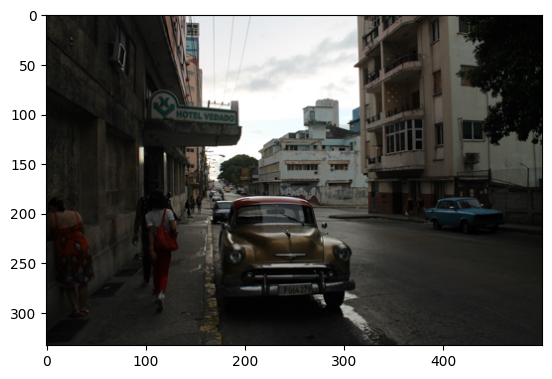

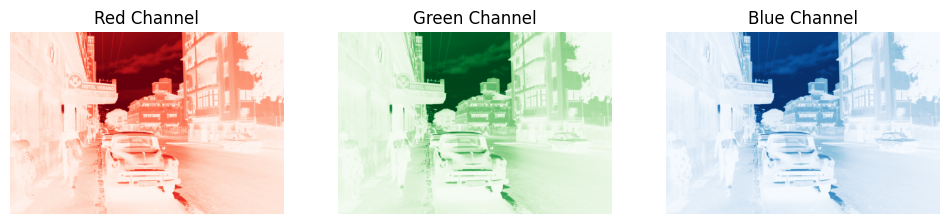

In [ ]:
import skimage as ski
import os
from natsort import natsorted, ns
import numpy as np
import matplotlib.pyplot as plt

bild01 = ski.io.imread(os.path.join("bild01.jpg"))

print("Shape of bild01:", bild01.shape)
print("Data type of bild01:", bild01.dtype)

plt.imshow(bild01)

red = bild01[:, :, 0]   # alle Zeilen und SPalten mit dem Rot-Kanal ausgwählt
green = bild01[:, :, 1]
blue = bild01[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)   # 1 Zeile, 3 Spalten, 1 Index der aktuellen Teilgrafik
plt.imshow(red, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.show()

